In [1]:
Задание 2. 

Входные данные:
* Новости о компании "Газпром", начиная с 2010 года
* Стоимость акций компании "Газпром" на ММВБ, начиная с 2010 года
    * цена открытия (Open)
    * цена закрытия (ClosingPrice)
    * максимальная цена за день (DailyHigh)
    * минимальная цена за день (DailyLow) 
    * объем бумаг (VolumePcs)
    
    
Проведите предобработку текстов: если считаете нужным, выполните токенизацию, приведение к нижнему регистру, лемматизацию и/или стемминг. Ответьте на следующие вопросы:
* Постройте частотный словарь по текстам, изобразите законы Ципфа и Хипса. 
* Есть ли корреляция между средней длинной текста за день и ценой закрытия?
* Есть ли корреляция между количеством упоминаний Алексея Миллера и ценой закрытия? Учтите разные варианты написания имени.
* Упоминаний какого газопровода в статьях больше: 
    * "северный поток"
    * "турецкий поток"?
* О каких санкциях пишут в статьях?

SyntaxError: invalid syntax (<ipython-input-1-2f7272da04a9>, line 1)

In [1]:
#system libs
import re, regex
import os, sys
import time
print(os.getcwd())
print(os.path.abspath(r'../hw1/gazprom.csv'))
print(os.path.exists(r'../hw1/gazprom.csv'))


f:\#hse2018\nlp-course-hse-summer-intensive\hw1
f:\#hse2018\nlp-course-hse-summer-intensive\hw1\gazprom.csv
True


#первичная подготовка данных:
текст приемлимого, на мой взгляд качества, не требует глубокой переработки перед использованием.
за исключением: 
а) строки без даты присоединены к предыдущим строкам;
б) разделитель ",", как неоднозначный в текстах, заменен на '\t'.
в) убраны "" в начале и конце текста.


#1. леммизация с использованием 
c:\Utils\mystem.exe -ldcs --eng-gr gazprom.csv gazprom_lemm.csv:
так же произведена разбивка на предложения
из теката убраны лишние символы, разделитель предложений ([.?!]\{\\s\}) заменен на символ \v.

In [2]:
import pandas as pd

csv_path='./gazprom_lemm.csv'
df = pd.read_csv(csv_path, names  = ['Date','Text'], sep='\t', \
                 header=None, skiprows=0, \
                 parse_dates=['Date'], dayfirst=True  )
#print(os.path.exists(csv_path))
#print(df.head(5))

# длина текста в строке
def str_len(text):
    try:
        return len(text)
    except:
        return 0

# в строке есть Миллер
regexp1=re.compile(r"\bмиллер\b")
def count_Miller(text, rx=regexp1):
    try:
        return len(rx.findall(text))
    except:
        return 0

# в строке есть т.п.
regexp2=re.compile(r"\bтурецкий поток\b")
def count_tp(text, rx=regexp2):
    try:
        return len(rx.findall(text))
    except:
        return 0

# в строке есть с.п.
regexp3=re.compile(r"\bсеверный поток\b")
def count_sp(text, rx=regexp3):
    try:
        return len(rx.findall(text))
    except:
        return 0

df['sent_len'] = df.Text.apply(str_len) # колонка длина сообщения
df['count_Mll'] = df.Text.apply(count_Miller) # "колонка сколька раз упомянут Миллер"

#print(df.head(5))


In [3]:
#days=list(df['Date'][:])
#df.text.dropna(inplace = True)
#list(df.Text)[:6][:20]



## * Упоминаний какого газопровода в статьях больше: 
    * "северный поток"
    * "турецкий поток"?

In [4]:
t_p = 0
s_p = 0

for t in df.Text[:] :
    s_p += count_sp(t)
    t_p += count_tp(t)

print('TS := {0}, NS := {1}, "Туреций поток" упоминается {2} "Северный поток".'.format(t_p, s_p, \
                            ("чаще, чем " if (t_p > s_p) else "реже, чем" if (t_p > s_p) else "так же как") ) )


TS := 39, NS := 14, "Туреций поток" упоминается чаще, чем  "Северный поток".


* Постройте частотный словарь по текстам, изобразите законы Ципфа и Хипса. 


## частотный словарь

In [5]:
from collections import Counter
n_types = []
n_tokens = []
tokens = []
cnt = Counter()
for index, row in df.iterrows():
    # t = str(row['Text'])
    tokens = re.findall(r'\w+', str(row['Text']))
    cnt.update(tokens) 
    n_types.append(len(cnt))
    n_tokens.append(sum(cnt.values()))
c1 = cnt.most_common(1)[0][1]
print("('слово', частота), отн-ние к 1-му")
for i in cnt.most_common(12):
    print('%(word)#30r \tреже в %(number)3.4f раз.' % {'word': i,  'number' :(c1 / i[1])} )
print('Ok: ',time.asctime())


('слово', частота), отн-ние к 1-му
                   ('в', 5480) 	реже в 1.0000 раз.
                  ('на', 3121) 	реже в 1.7558 раз.
             ('газпром', 2973) 	реже в 1.8433 раз.
                   ('и', 2435) 	реже в 2.2505 раз.
                  ('по', 1621) 	реже в 3.3806 раз.
                   ('с', 1448) 	реже в 3.7845 раз.
            ('компания', 1389) 	реже в 3.9453 раз.
                 ('газ', 1341) 	реже в 4.0865 раз.
                  ('не', 1033) 	реже в 5.3049 раз.
                 ('млрд', 906) 	реже в 6.0486 раз.
                  ('год', 870) 	реже в 6.2989 раз.
                  ('что', 852) 	реже в 6.4319 раз.
Ok:  Sun Aug 26 05:58:11 2018


## Закон Ципфа

Wall time: 0 ns
Всего уникальных слов в тесте:= 8076


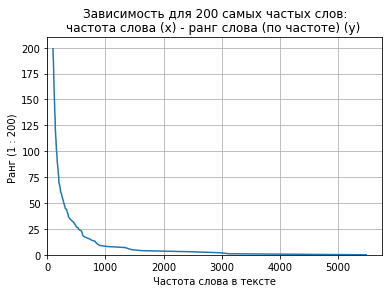

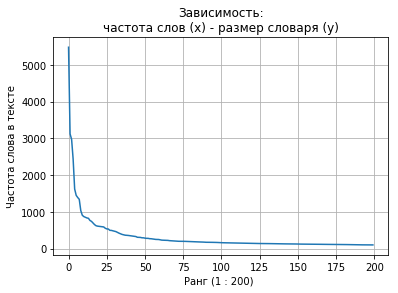

Ok:  Sun Aug 26 05:58:16 2018


In [6]:
%matplotlib inline
%time
import pandas as pd
import matplotlib.pyplot as plt
freqs = list(cnt.values())

freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
m = len(freqs)
print("Всего уникальных слов в тесте:= {0}".format(m))
n = 200 if m > 200 else m
ax.plot(freqs[:n], range(n)) # ?? это график частота - ранг, а должен быть ранг / частота ?
# Задаем заголовок диаграммы
#plt.title(u'Зависимость: размер словаря (x) - частота слов (y) ')
plt.title(u'Зависимость для {0} самых частых слов:\nчастота слова (x) - ранг слова (по частоте) (y) '.\
         format(n))
# Задаем подписи к осям X и Y
plt.xlabel(u'Частота слова в тексте')
plt.ylabel(u'Ранг (1 : 200) ') #  место в упорядоченном словаре
# Включаем сетку
plt.grid()
# начало 1
plt.xlim(1, freqs[0]*1.05)
# начало 0
plt.ylim(0, n*1.05)
#
plt.show()

fig, ax = plt.subplots()
ax.plot(range(n), freqs[:n]) # ?? это график  ранг / частота ?
# Задаем заголовок диаграммы
plt.title(u'Зависимость:\nчастота слов (x) - размер словаря (y)')
# Задаем подписи к осям X и Y
plt.xlabel(u'Ранг (1 : 200) ') #  место в упорядоченном словаре
plt.ylabel(u'Частота слова в тексте')
# Включаем сетку
plt.grid()
#
plt.show()

print('Ok: ',time.asctime())


## Закон Хипса

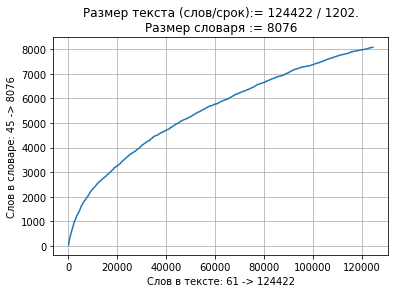

In [7]:
t="Размер текста (слов/срок):= {0} / {2}.\nРазмер словаря := {1}".format( \
                        n_tokens[-1], n_types[-1], len(n_types))

fig, ax = plt.subplots()
# Задаем заголовок диаграммы
plt.title(t)
ax.plot(n_tokens, n_types) # график: x - размер текста,  y - число уникальных слов
# Задаем подписи к осям X и Y
plt.xlabel(u'Слов в тексте: {} -> {}'.format(n_tokens[0],n_tokens[-1])) # размер обработанного текста
plt.ylabel(u'Слов в словаре: {} -> {}'.format(n_types[0],n_types[-1])) # размер накопленного словаря
# Включаем сетку
plt.grid()
#
plt.show()

In [8]:
# выгрузить данные для статистического анализа:
import pickle
csv_path='./gazprom_msgs2.csv'
bin_path='./gazprom_msgs2.bin'

with open(bin_path,'wb') as f:
    if (pickle.dump(obj=df, file=f) == None): 
        print('Ok: ',os.path.abspath(bin_path))
    else:
        print('Err:',os.path.abspath(bin_path))

if (df.to_csv(csv_path, sep='\t', \
        decimal='.', date_format=r'%Y-%m-%d') == None):
        print(os.path.abspath(csv_path),'Ok: ',time.asctime())



#df = pd.to_csv(csv_path, sep='\t', date_format='%Y-%m-%d'  )


Ok:  f:\#hse2018\nlp-course-hse-summer-intensive\hw1\gazprom_msgs2.bin
f:\#hse2018\nlp-course-hse-summer-intensive\hw1\gazprom_msgs2.csv Ok:  Sun Aug 26 05:58:34 2018


## Есть ли корреляция между средней длинной текста за день и ценой закрытия?

#### зависимость рассчитана на всем массиве записей, сообщений, когда сообщение выходило в день проведения торговли на бирже.
1) коэффициент корреляции для пары: "длина текста" - "разница в цене закрытия и открытия":
    -0.023489857

2). коэффициент корреляции для пары: "длина текста" - "цена закрытия":
    0.015200417

:
1) зависимость рассчитана на массиве записей, когда было упоминание А.Миллера в сообщениях.
2) зависимость рассчитана на всем массиве записей, сообщений, когда сообщение выходило в день проведения торговли на бирже.

рассчеты выполнены в Exceel 2003.

## * Есть ли корреляция между количеством упоминаний Алексея Миллера и ценой закрытия? Учтите разные варианты написания имени.

#### зависимость рассчитана на всем массиве записей, сообщений, когда сообщение выходило в день проведения торговли на бирже.
##### рассчитана зависимость с приростом цены дня, а не с ценой закрытия:
    1) 0.18660991
    2) 0.012861578

1) зависимость рассчитана на массиве записей, когда было упоминание А.Миллера в сообщениях.
2) зависимость рассчитана на всем массиве записей, сообщений, когда сообщение выходило в день проведения торговли на бирже.

##### зависимость "цены закрытия" от "упоминание А.Миллера в сообщениях", на всем массиве сообщений:
    0.010635076

рассчеты выполнены в Exceel 2003.